Accuracy: 0.8298


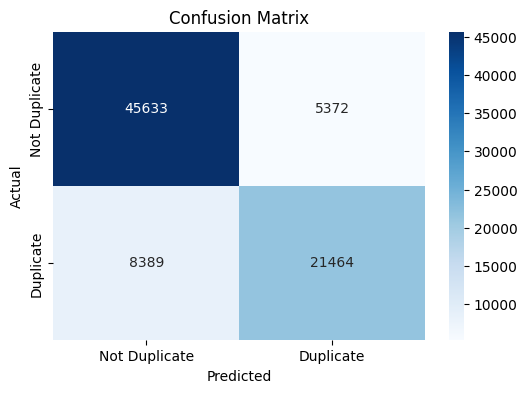


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     51005
           1       0.80      0.72      0.76     29853

    accuracy                           0.83     80858
   macro avg       0.82      0.81      0.81     80858
weighted avg       0.83      0.83      0.83     80858


Sample Test Row Features:
       freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
70552          1          8     85     78          15          15   

       word_Common  word_Total  word_share  freq_q1+q2  ...   ctc_max  \
70552           14          30    0.466665         163  ...  0.933327   

       last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
70552           1.0            1.0           0.0      15.0               99   

       token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
70552                96          96                  91              0.886076  

[1 rows x 26 col

In [1]:
# Option 1: Train with only numerical features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("quora_cleaned_train_final.csv")

# 2) Select only numerical features (drop text columns like question1, question2, qid1, qid2)
X = df.drop(columns=["id", "qid1", "qid2", "question1", "question2", "is_duplicate"], errors="ignore")
y = df["is_duplicate"]

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4) Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# 5) Predictions
y_pred = model.predict(X_test)

# 6) Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 7) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Duplicate", "Duplicate"], yticklabels=["Not Duplicate", "Duplicate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8) Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9) Test with a sample question
# Example: "What is AI?" vs "Explain artificial intelligence"
sample = X_test.iloc[0:1]   # take one test row
print("\nSample Test Row Features:")
print(sample)

pred = model.predict(sample)
print("\nPredicted Duplicate?" , "Yes" if pred[0]==1 else "No")

